In [34]:
# import modules 

import torch
import torch.nn as nn 
import torchvision as tv 
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

from tqdm import tqdm

import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
train_mnist = pd.read_csv('/content/drive/MyDrive/train_mnist.csv')

In [36]:
train_mnist

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
!pip3 install more_itertools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:


train_mnist_formed = []
for i, row in train_mnist.iterrows():
    row = row.tolist()
    label = row[0]
    image = row[1:]
    

    total_image = []
    batches_image = np.array_split(image , 28)
    
    for i in batches_image :
      total_image.append(i)

    
    
    total_image = np.expand_dims( total_image , axis = 0 )
    total_image = torch.FloatTensor(total_image)
    image_w_label = ( total_image , label )
    train_mnist_formed.append(image_w_label)
  # prefit dataframe to view ( image , label) 

In [39]:
ds_mnist = train_mnist_formed

In [8]:
ds_mnist[0][0].shape # image in (image , label) has size 28 x 28 pixels (now tensors) , and 1 colour


torch.Size([1, 28, 28])

In [ ]:
len(ds_mnist)

42000

In [ ]:
ds_mnist[0][0]

tensor([[[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 188., 255.,
           94.,   0.,   0.,   0.,   0.,   0.],
     

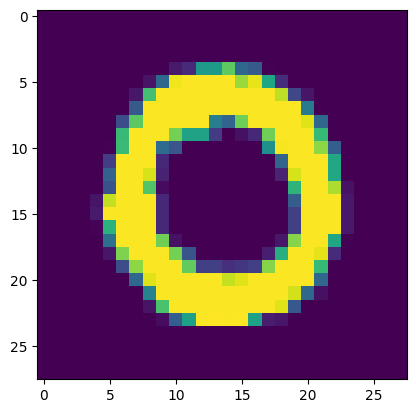

In [ ]:
plt.imshow( ds_mnist[1][0].squeeze() ) #squeeze to delete the colour dimension

In [40]:
#DataLoader

batch_size = 8

dataloader = torch.utils.data.DataLoader(ds_mnist ,
                                         batch_size = batch_size ,
                                         shuffle = True , 
                                         num_workers= 0 , 
                                         drop_last = True 
                                         )



Функция активации добавляет нелинейности

In [72]:
# torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)

class Neural_numbers(nn.Module):
  #Arch и ее блоки
  def __init__(self):
        
        super().__init__() 
        
        self.conv1= nn.Sequential( nn.Conv2d( 1 , 16 , kernel_size = 5 , stride = 1 , padding = 2 ),
                                  nn.Dropout(p=0.05) ,
                                  nn.BatchNorm2d(16) ,
                                  nn.ReLU() ,
                                  nn.MaxPool2d( (2,2) )


        )

        self.conv2 = nn.Sequential( 
                                
                                nn.Conv2d( 16 , 32 , 5 , 1 , 2 ) ,
                                nn.Dropout( p =0.05) , 
                                nn.BatchNorm2d(32) , 
                                nn.ReLU() , 
                                nn.MaxPool2d( (2,2 ))

        )
        
        # self.conv3 = nn.Sequential(
        #                         nn.Conv2d( 32 , 64 , 5 , 1 , 2 ) ,
        #                         nn.BatchNorm2d(64) , 
        #                         nn.ReLU() 


        # )
        

        self.flat = nn.Flatten()
        self.linear1 = nn.Linear(32 * 7  * 7 , 100)
        self.linear2 = nn.Linear(100 , 100)
        self.linear3 = nn.Linear(100 , 10)
        

        self.act = nn.PReLU()
       
  def forward(self, x): 
    x = self.conv1(x)
    x = self.conv2(x)
    # x = self.conv3(x)
    x = self.flat(x)
    x = self.act(self.linear1(x))
    x = self.act( self.linear2(x))
    x =  self.linear3(x)
    return x 
        

        

In [73]:
model = Neural_numbers()


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 74.7MB/s]


In [74]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW( model.parameters(), lr= 3e-4  , amsgrad = True )

In [75]:
def accuracy(pred , label) :
    
    answer = F.softmax(pred.detach()).numpy().argmax(1)  == label.numpy().argmax(1)
    
    return answer.mean()

In [62]:
for img , label in dataloader :
  print(img.shape)
  break  # see how the data in dataloader looks

torch.Size([8, 1, 28, 28])


In [82]:
epochs = 25

for epoch in range(epochs):

  loss_val = 0 
  acc_val = 0 

  for img , label in (pbar := tqdm(dataloader)) :
    #opt z g 
    label = nn.functional.one_hot( label , 10 ).float() 
    pred = model(img) 

    loss = loss_fn(pred , label) 
    optimizer.zero_grad() 

    loss.backward() 

    loss_item = loss.item()
    loss_val += loss_item

    acc_current = accuracy(pred , label)
    acc_val  += acc_current
    optimizer.step() 

  
   
    pbar.set_description(f'loss : {loss_item:.4f}\taccuracy : {acc_current:.3f}')  
  print( f'epoch {epoch + 1 }' , f' loss_val : {loss_val / len(dataloader) }'
  , f'acc_val : {acc_val / len(dataloader)}')

  0%|          | 0/5250 [00:00<?, ?it/s]<ipython-input-75-758b855bc9b3>:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  answer = F.softmax(pred.detach()).numpy().argmax(1)  == label.numpy().argmax(1)
loss : 0.0008	accuracy : 1.000: 100%|██████████| 5250/5250 [01:05<00:00, 80.76it/s]


epoch 1  loss_val : 0.0316973438031758 acc_val : 0.9896666666666667


loss : 0.0056	accuracy : 1.000: 100%|██████████| 5250/5250 [01:03<00:00, 82.22it/s]


epoch 2  loss_val : 0.024721231741846903 acc_val : 0.9921190476190476


loss : 0.0011	accuracy : 1.000: 100%|██████████| 5250/5250 [01:05<00:00, 80.14it/s]


epoch 3  loss_val : 0.019691988932134075 acc_val : 0.9937857142857143


loss : 0.0003	accuracy : 1.000: 100%|██████████| 5250/5250 [01:04<00:00, 81.66it/s]


epoch 4  loss_val : 0.016026478232827296 acc_val : 0.9951190476190476


loss : 0.0001	accuracy : 1.000: 100%|██████████| 5250/5250 [01:04<00:00, 81.71it/s]


epoch 5  loss_val : 0.01380389167184417 acc_val : 0.9959285714285714


loss : 0.0005	accuracy : 1.000: 100%|██████████| 5250/5250 [01:05<00:00, 80.74it/s]


epoch 6  loss_val : 0.009612647252104775 acc_val : 0.9970476190476191


loss : 0.0003	accuracy : 1.000: 100%|██████████| 5250/5250 [01:04<00:00, 81.84it/s]


epoch 7  loss_val : 0.0100714659733229 acc_val : 0.9967857142857143


loss : 0.0000	accuracy : 1.000: 100%|██████████| 5250/5250 [01:08<00:00, 76.49it/s]


epoch 8  loss_val : 0.00865852377235065 acc_val : 0.9973809523809524


loss : 0.0012	accuracy : 1.000: 100%|██████████| 5250/5250 [01:10<00:00, 74.41it/s]


epoch 9  loss_val : 0.006777983134062665 acc_val : 0.9979761904761905


loss : 0.0000	accuracy : 1.000: 100%|██████████| 5250/5250 [01:08<00:00, 76.12it/s]


epoch 10  loss_val : 0.006377132623324423 acc_val : 0.9983095238095238


loss : 0.0000	accuracy : 1.000: 100%|██████████| 5250/5250 [01:11<00:00, 73.72it/s]


epoch 11  loss_val : 0.004442387713510977 acc_val : 0.9989523809523809


loss : 0.0002	accuracy : 1.000: 100%|██████████| 5250/5250 [01:11<00:00, 73.46it/s]


epoch 12  loss_val : 0.004479973996012046 acc_val : 0.9987619047619047


loss : 0.0000	accuracy : 1.000: 100%|██████████| 5250/5250 [01:10<00:00, 74.50it/s]


epoch 13  loss_val : 0.0026827892931000786 acc_val : 0.9994761904761905


loss : 0.0000	accuracy : 1.000: 100%|██████████| 5250/5250 [01:12<00:00, 72.75it/s]


epoch 14  loss_val : 0.002116645858672235 acc_val : 0.9995952380952381


loss : 0.0000	accuracy : 1.000: 100%|██████████| 5250/5250 [01:11<00:00, 73.30it/s]


epoch 15  loss_val : 0.0016516025744542924 acc_val : 0.9997619047619047


loss : 0.0000	accuracy : 1.000: 100%|██████████| 5250/5250 [01:11<00:00, 73.64it/s]


epoch 16  loss_val : 0.0028045529579514166 acc_val : 0.9992857142857143


loss : 0.0012	accuracy : 1.000: 100%|██████████| 5250/5250 [01:11<00:00, 73.54it/s]


epoch 17  loss_val : 0.002461467446314674 acc_val : 0.9994285714285714


loss : 0.0005	accuracy : 1.000: 100%|██████████| 5250/5250 [01:10<00:00, 74.14it/s]


epoch 18  loss_val : 0.0012831811482493926 acc_val : 0.9998809523809524


loss : 0.0000	accuracy : 1.000: 100%|██████████| 5250/5250 [01:11<00:00, 73.94it/s]


epoch 19  loss_val : 0.0015458852482078966 acc_val : 0.9996904761904762


loss : 0.0044	accuracy : 1.000: 100%|██████████| 5250/5250 [01:10<00:00, 74.46it/s]


epoch 20  loss_val : 0.0017427677702191236 acc_val : 0.9997142857142857


loss : 0.0005	accuracy : 1.000: 100%|██████████| 5250/5250 [01:11<00:00, 73.39it/s]


epoch 21  loss_val : 0.0013416923858448867 acc_val : 0.9997857142857143


loss : 0.0000	accuracy : 1.000: 100%|██████████| 5250/5250 [01:11<00:00, 73.03it/s]


epoch 22  loss_val : 0.0013133360639415303 acc_val : 0.9998095238095238


loss : 0.0006	accuracy : 1.000: 100%|██████████| 5250/5250 [01:09<00:00, 75.79it/s]


epoch 23  loss_val : 0.0011746796620727804 acc_val : 0.9999523809523809


loss : 0.0000	accuracy : 1.000: 100%|██████████| 5250/5250 [01:10<00:00, 74.25it/s]


epoch 24  loss_val : 0.000866218357763355 acc_val : 0.9999761904761905


loss : 0.0001	accuracy : 1.000: 100%|██████████| 5250/5250 [01:11<00:00, 73.24it/s]

epoch 25  loss_val : 0.0006958579933537401 acc_val : 1.0


In [83]:
test_mnist = pd.read_csv('/content/drive/MyDrive/test_mnist.csv')

In [84]:
test_mnist

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
test_mnist_formed = []
for i, row in test_mnist.iterrows():
    row = row.tolist()
    
    
    

    total_image = []
    batches_image = np.array_split(row , 28)
    
    for i in batches_image :
      total_image.append(i)

    
    
    total_image = np.expand_dims( total_image , axis = 0 )
    total_image = torch.FloatTensor(total_image)
    
    test_mnist_formed.append(total_image)

In [86]:
test_dataloader = torch.utils.data.DataLoader( test_mnist_formed ,
                                         batch_size = 28 ,
                                         shuffle = False , 
                                         num_workers= 0 , 
                                         drop_last = False 
                                         )


In [87]:

list_of_predictions = []

for i in test_dataloader :
  
  
  
  
  nash_pred = model(i)
  

  prediction = F.softmax(nash_pred.detach()).numpy().argmax(1)
  
  for i in prediction :

  
    list_of_predictions.append(i)

  
  




<ipython-input-87-d2fdda41e4e9>:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  prediction = F.softmax(nash_pred.detach()).numpy().argmax(1)


In [88]:
len(list_of_predictions)

28000

In [ ]:
list_of_predictions

[2,
 0,
 9,
 9,
 3,
 7,
 0,
 3,
 0,
 3,
 5,
 7,
 4,
 0,
 4,
 3,
 3,
 1,
 9,
 0,
 9,
 1,
 1,
 5,
 7,
 4,
 2,
 7,
 4,
 7,
 7,
 5,
 4,
 2,
 6,
 2,
 5,
 5,
 1,
 6,
 7,
 7,
 4,
 9,
 8,
 7,
 8,
 2,
 6,
 7,
 6,
 8,
 8,
 3,
 8,
 2,
 1,
 2,
 2,
 0,
 4,
 1,
 7,
 0,
 0,
 0,
 1,
 9,
 0,
 1,
 6,
 5,
 8,
 8,
 2,
 8,
 9,
 9,
 2,
 3,
 5,
 4,
 1,
 0,
 9,
 2,
 4,
 3,
 6,
 7,
 2,
 0,
 6,
 6,
 1,
 4,
 3,
 9,
 7,
 4,
 0,
 9,
 2,
 0,
 7,
 3,
 0,
 5,
 0,
 8,
 0,
 0,
 4,
 7,
 1,
 7,
 1,
 1,
 3,
 3,
 3,
 7,
 2,
 8,
 6,
 3,
 8,
 7,
 8,
 4,
 3,
 5,
 6,
 0,
 0,
 0,
 3,
 1,
 3,
 6,
 4,
 3,
 4,
 5,
 5,
 8,
 7,
 7,
 2,
 8,
 4,
 3,
 5,
 6,
 5,
 3,
 7,
 5,
 7,
 8,
 3,
 0,
 4,
 5,
 1,
 3,
 7,
 6,
 3,
 0,
 2,
 7,
 8,
 6,
 1,
 3,
 7,
 4,
 1,
 2,
 4,
 8,
 5,
 2,
 4,
 9,
 2,
 1,
 6,
 0,
 6,
 1,
 4,
 9,
 6,
 0,
 9,
 7,
 6,
 9,
 1,
 9,
 0,
 9,
 9,
 0,
 8,
 4,
 6,
 2,
 0,
 9,
 3,
 6,
 3,
 2,
 1,
 6,
 3,
 4,
 2,
 3,
 1,
 2,
 2,
 0,
 4,
 6,
 1,
 0,
 0,
 4,
 9,
 1,
 7,
 3,
 2,
 3,
 8,
 6,
 8,
 6,
 2,
 8,
 5,
 5,
 4,
 8,
 3,
 5,


In [89]:
list_of_indixes = [ i for i in range(1 , 28001)]

In [ ]:
len(list_of_indixes)

28000

In [90]:
submission = pd.DataFrame({'ImageId' : list_of_indixes , 'Label' : list_of_predictions })

In [91]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [92]:
submission.to_csv( 'Conv_drop_0_05.csv' , index= False )